<a href="https://colab.research.google.com/github/rammanichaudhuri/electricity-price-prediction/blob/main/electricity_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving electricity_prices.csv to electricity_prices.csv
User uploaded file "electricity_prices.csv" with length 4048368 bytes


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

In [4]:
data = pd.read_csv("electricity_prices.csv", na_values=['?'])

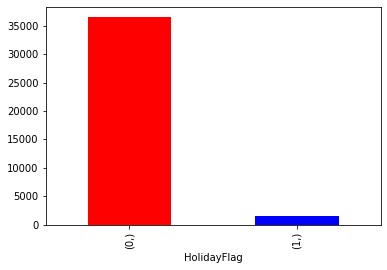

In [5]:
data.value_counts(['HolidayFlag']).plot(kind='bar', color=['red', 'blue'])

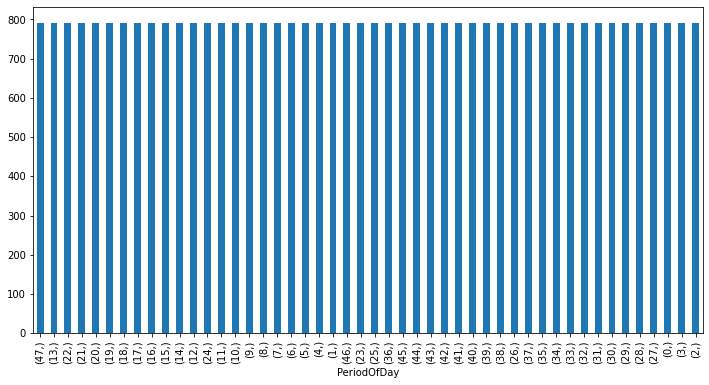

In [6]:
data.value_counts(['PeriodOfDay']).plot(kind='bar', figsize=(12, 6))

In [7]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()

In [8]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()

In [9]:
for label, content in data.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
    # We add the +1 because pandas encodes missing categories as -1
        data[label] = pd.Categorical(content).codes+1

In [10]:
for label, content in data.items():
    data[label] = content.fillna(content.median())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


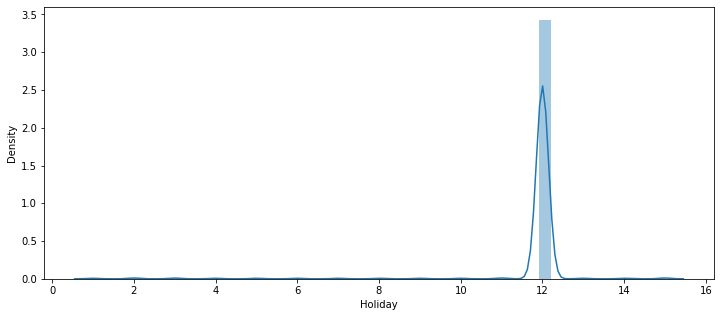

In [12]:
import seaborn as sns
plt.figure(figsize = (12, 5))
sns.distplot(data['Holiday'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


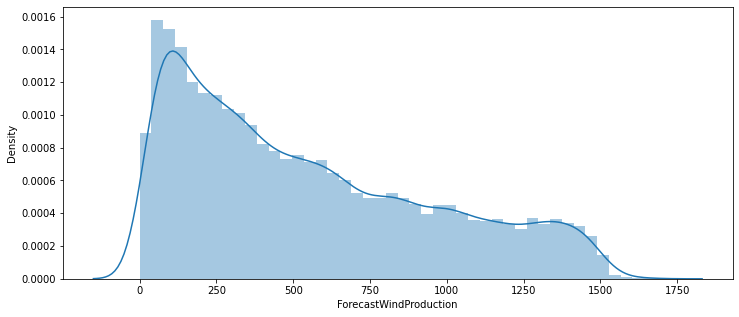

In [13]:
plt.figure(figsize = (12, 5))
sns.distplot(data['ForecastWindProduction'])
plt.show()

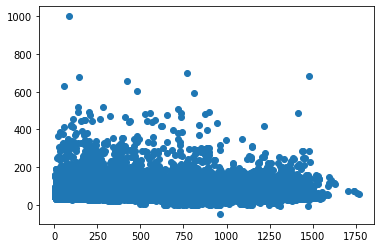

In [14]:
fig, ax = plt.subplots()
ax.scatter(data['ActualWindProduction'], data['SMPEP2'])

In [15]:
def plot_fourChart(df, feature1, feature2):
    """
    plot a heatmap to compare the parameters with the actual productivity of energy
    """
    sns.jointplot(df.loc[:,feature1], df.loc[:,feature2], data=df,
              kind="kde", fill=True,
              color='blue', height=6)
    pass

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


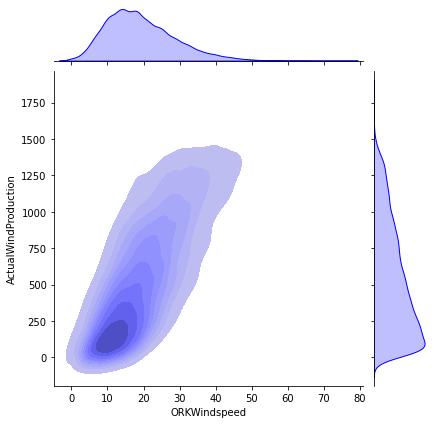

In [16]:
plot_fourChart(data, 'ORKWindspeed', 'ActualWindProduction')

In [18]:
data.groupby(['Year']).count()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
Year,,,,,,,,,,,,,,,,,
2011,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928,2928
2012,17566,17566,17566,17566,17566,17566,17566,17566,17566,17566,17566,17566,17566,17566,17566,17566,17566
2013,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520


In [21]:
df11 = data[data.Year == 2011] #test data
df12 = data[data.Year == 2012] #trainig data
df13 = data[data.Year == 2013] #valid data
len(df11), len(df12), len(df13)
df11_tmp = df11.copy()
df12_tmp = df12.copy()
df13_tmp = df13.copy()

In [22]:
FirstPerdDay0 = df11[df11.PeriodOfDay == 0]

In [23]:
FirstPerdDay0

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,961,12,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
48,2209,12,0,2,44,2,11,2011,0,1305.10,3591.85,44.47,12.0,46.3,357.17,1357.0,2936.40,51.45
96,3457,12,0,3,44,3,11,2011,0,1214.47,3645.55,54.21,12.0,35.2,373.89,1252.0,3235.88,47.38
144,4705,12,0,4,44,4,11,2011,0,93.65,3714.38,52.39,8.0,5.6,622.35,158.0,3446.04,45.37
192,5953,12,0,5,44,5,11,2011,0,83.40,3819.31,46.67,6.0,13.0,610.49,88.0,3647.63,51.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,33551,12,0,1,52,27,12,2011,0,519.00,4053.44,102.67,9.0,27.8,383.18,610.0,3327.19,86.79
2736,34799,12,0,2,52,28,12,2011,0,1328.84,4052.32,46.13,7.0,24.1,336.00,1197.0,3225.75,44.10
2784,35999,12,0,3,52,29,12,2011,0,1135.60,4182.77,47.24,4.0,22.2,316.25,1283.0,3263.45,44.10
2832,37151,12,0,4,52,30,12,2011,0,557.62,4108.10,44.52,9.0,18.5,387.20,835.0,3443.52,72.89


In [24]:
df_train = df12
df_val = df13
df_test = df11.drop('SMPEP2', axis=1)

In [25]:
X_train, y_train = df_train.drop("SMPEP2", axis=1), df_train.SMPEP2
X_valid, y_valid = df_val.drop("SMPEP2", axis=1), df_val.SMPEP2

In [26]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)

In [27]:
model.fit(X_train ,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error



#create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
             'Valid MAE': mean_absolute_error(y_valid, val_preds),
             'Trainig R^2': model.score(X_train, y_train),
             'valid R^2': model.score(X_valid, y_valid)}
    return scores

In [29]:
show_scores(model)

{'Trainig R^2': 0.9497521601393554,
 'Training MAE': 2.728931504041899,
 'Valid MAE': 15.599897688356165,
 'valid R^2': 0.42922747813888457}

In [30]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [31]:
rs_model.best_params_

{'max_depth': 5,
 'max_features': 0.5,
 'max_samples': 10000,
 'min_samples_leaf': 13,
 'min_samples_split': 12,
 'n_estimators': 60}

In [32]:
show_scores(rs_model)

{'Trainig R^2': 0.5149952656148488,
 'Training MAE': 12.303961343380895,
 'Valid MAE': 14.662157349379395,
 'valid R^2': 0.4516705452956009}

In [33]:
ideal_model = RandomForestRegressor(n_estimators=70,
                                    min_samples_leaf=13,
                                    min_samples_split=10,
                                    max_features='sqrt',
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=13,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
show_scores(ideal_model)

{'Trainig R^2': 0.6615820660346543,
 'Training MAE': 8.462583779852249,
 'Valid MAE': 14.597165764601188,
 'valid R^2': 0.4596146270116305}

In [35]:
test_preds = ideal_model.predict(df_test)
test_preds

array([52.26233348, 52.83705931, 53.03707278, ..., 54.51960856,
       55.32842269, 54.3519722 ])

In [36]:
df_preds = pd.DataFrame()
df_preds["predicted Price"] = test_preds
df_preds

,predicted Price
0,52.262333
1,52.837059
2,53.037073
3,50.946448
4,42.702182
...,...
2923,59.125443
2924,56.056611
2925,54.519609
2926,55.328423


In [37]:
PriceCol  = ['SMPEP2']
Price = df11[PriceCol]
frames = [Price, df_preds]
result = pd.concat(frames, axis=1)
result.shape, Price.shape

((2928, 2), (2928, 1))

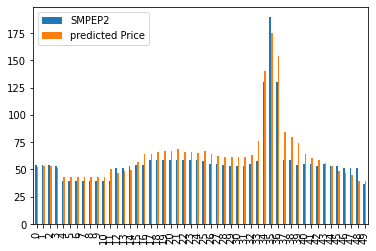

In [38]:
result[:50].plot.bar();

In [39]:
rate = result['SMPEP2']/result['predicted Price']
rate

0       1.039372
1       1.026363
2       1.022492
3       1.049533
4       0.933676
          ...   
2923    0.818260
2924    0.814355
2925    0.837313
2926    0.825073
2927    0.839896
Length: 2928, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


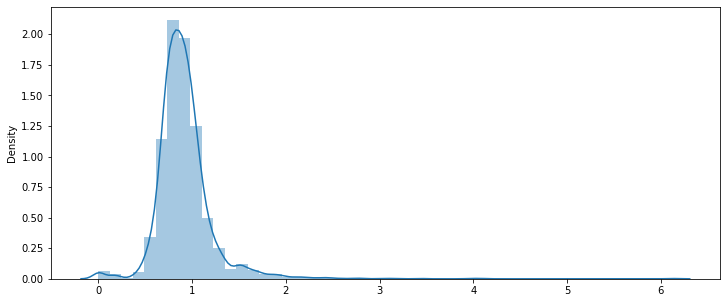

In [40]:
plt.figure(figsize = (12, 5))
sns.distplot(rate)
plt.show()

In [41]:
ideal_model.feature_importances_

array([2.48008618e-02, 2.29367994e-04, 2.86548174e-04, 2.01410628e-02,
       3.13641380e-02, 1.54380403e-02, 2.34212778e-02, 0.00000000e+00,
       1.15917457e-01, 2.26416515e-02, 1.51955061e-01, 3.29315635e-01,
       1.64284338e-02, 9.90882295e-03, 2.51022198e-02, 2.63024767e-02,
       1.86746946e-01])

In [42]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=100):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

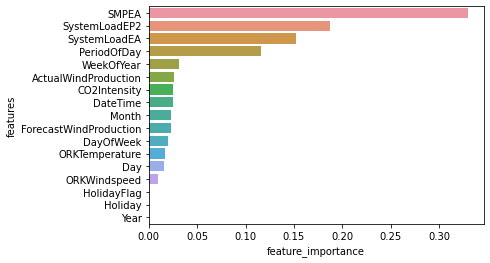

In [43]:
plot_features(X_train.columns, ideal_model.feature_importances_)

Ridge regressor

In [44]:
from sklearn.linear_model import Ridge

In [45]:
model2 = Ridge(alpha=0.01)
model2.fit(X_train, y_train)
show_scores(model2)
preds2 = model2.predict(df_test)


In [46]:
df_preds2 = pd.DataFrame()
df_preds2["predicted Price2"] = preds2
df_preds2

,predicted Price2
0,49.512552
1,47.942289
2,46.767943
3,45.472921
4,37.592552
...,...
2923,65.554411
2924,63.032885
2925,62.563542
2926,63.747575


In [47]:
PriceCol  = ['SMPEP2']
Price = df11[PriceCol]
frames2 = [df_preds2, Price]
result = pd.concat(frames2, axis=1)
result

,predicted Price2,SMPEP2
0,49.512552,54.32
1,47.942289,54.23
2,46.767943,54.23
3,45.472921,53.47
4,37.592552,39.87
...,...,...
2923,65.554411,48.38
2924,63.032885,45.65
2925,62.563542,45.65
2926,63.747575,45.65


In [48]:
rate2 = result['SMPEP2']/result['predicted Price2']
rate

0       1.039372
1       1.026363
2       1.022492
3       1.049533
4       0.933676
          ...   
2923    0.818260
2924    0.814355
2925    0.837313
2926    0.825073
2927    0.839896
Length: 2928, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


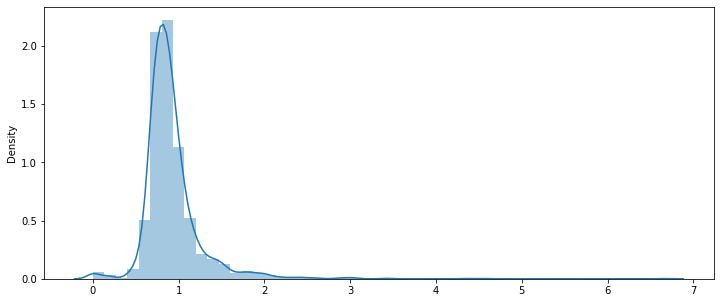

In [49]:
plt.figure(figsize = (12, 5))
sns.distplot(rate2)
plt.show()